In [1]:
import cv2
import numpy as np
from numpy.linalg import eig, eigh
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import eigh as sci_eig
%matplotlib inline

In [20]:
# img = cv2.imread('../house-detect/resources/lena.png')

img = np.zeros(shape=(5, 5, 3), dtype="uint8")
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if i <= j:
            img[i][j] = [255, 255, 255]

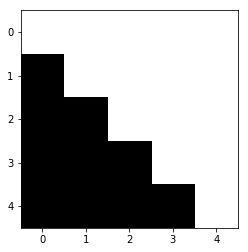

In [21]:
plt.imshow(img)

[[ 0.          0.          0.          0.          0.          1.73205081
   0.          0.          0.          0.          1.73205081  1.73205081
   0.          0.          0.          1.73205081  1.73205081  1.73205081
   0.          0.          1.73205081  1.73205081  1.73205081  1.73205081
   0.        ]
 [ 0.          0.          0.          0.          0.          1.73205081
   0.          0.          0.          0.          1.73205081  1.73205081
   0.          0.          0.          1.73205081  1.73205081  1.73205081
   0.          0.          1.73205081  1.73205081  1.73205081  1.73205081
   0.        ]
 [ 0.          0.          0.          0.          0.          1.73205081
   0.          0.          0.          0.          1.73205081  1.73205081
   0.          0.          0.          1.73205081  1.73205081  1.73205081
   0.          0.          1.73205081  1.73205081  1.73205081  1.73205081
   0.        ]
 [ 0.          0.          0.          0.          0.          1.73

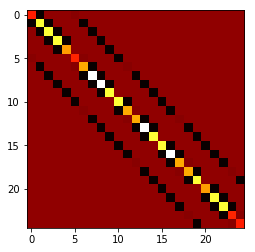

In [22]:
img_norm = np.copy(img)
img_norm = cv2.normalize(img, dst=img_norm, alpha=0., beta=1.,
                         norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)

n_pix = img.shape[0] * img.shape[1]
height = img.shape[0]
width = img.shape[1]

vector_img = img_norm.reshape((n_pix, img.shape[2]))
dist_mat = cdist(vector_img, vector_img, 'euclidean')

print(dist_mat)

weights = np.zeros(shape=(n_pix, n_pix))
diag = np.zeros(shape=(n_pix, n_pix))

for x in range(height):
    for y in range(width):
        sum1 = 0.
        idx = x * width + y

        if x > 0:
            sqr = dist_mat[idx][idx - width] ** 2
            weights[idx][idx - width] = np.exp(-sqr)
            sum1 += weights[idx][idx - width]
            
        if x < height - 1:
            sqr = dist_mat[idx][idx + width] ** 2
            weights[idx][idx + width] = np.exp(-sqr)
            sum1 += weights[idx][idx + width]
            
        if y > 0:
            sqr = dist_mat[idx][idx - 1] ** 2
            weights[idx][idx - 1] = np.exp(-sqr)
            sum1 += weights[idx][idx - 1]
            
        if y < width - 1:
            sqr = dist_mat[idx][idx + 1] ** 2
            weights[idx][idx + 1] = np.exp(-sqr)
            sum1 += weights[idx][idx + 1]

        diag[idx][idx] = sum1

# print(weights)
lap = diag - weights
plt.imshow(lap, cmap='hot', interpolation='nearest')
print(lap)

In [23]:
lap[1040][1040]

IndexError: index 1040 is out of bounds for axis 0 with size 25

In [6]:
lambdas, vectors = sci_eig(lap)

In [7]:
idx = np.argsort(lambdas)
lambdas = lambdas[idx]
vectors = vectors.T[idx]

In [8]:
print(lambdas)
print(vectors.T)

[ -1.99433975e-16   2.79729752e-03   3.87085191e-03 ...,   7.96142075e+00
   7.97989329e+00   7.98068092e+00]
[[ -2.00000000e-02   2.98294726e-03  -4.05603241e-02 ...,   1.36516394e-06
    2.95436693e-09  -3.41974563e-07]
 [ -2.00000000e-02   3.24719033e-03  -4.04286229e-02 ...,  -9.42664728e-06
   -1.53310166e-09   2.36796089e-06]
 [ -2.00000000e-02   3.63797326e-03  -4.02258484e-02 ...,   3.13689198e-05
   -2.69488309e-08  -7.91675269e-06]
 ..., 
 [ -2.00000000e-02  -3.03672124e-03   3.98572939e-02 ...,  -4.55160769e-07
    2.61582442e-06  -1.14963288e-07]
 [ -2.00000000e-02  -2.49211429e-03   4.00521235e-02 ...,   1.78073591e-07
   -3.80439653e-07   4.47606678e-08]
 [ -2.00000000e-02   2.98294726e-03   4.05603241e-02 ...,  -1.36516394e-06
    2.95436694e-09  -3.41974563e-07]]


In [14]:
dst = np.zeros(shape=(img.shape[0] * img.shape[1]), dtype='float64')

# vectors = vectors.T
for k in range(len(vectors)):
#     if lambdas[k] > 0:
    dst += 1. / np.sqrt(lambdas[k] + 0.0001) * vectors[k]
        
# print(dst.shape)
        
dst_ = np.zeros(shape=(img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        dst_[i][j] = dst[i * img.shape[1] + j]
        
# dst = dst.reshape((img.shape[0], img.shape[1]))

In [15]:
np.linalg.norm([0.5,0.5,0.5, 0.5])

1.0

In [16]:
dst_norm = np.zeros(shape=dst.shape)
dst_norm = cv2.normalize(dst_, dst=dst_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

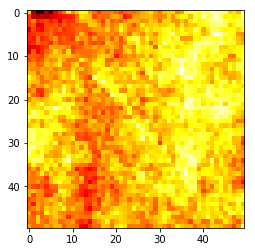

In [17]:
plt.imshow(dst_norm, interpolation='none', cmap='hot')

In [18]:
print(dst_norm)

[[ 0.68845522  0.23388299  0.         ...,  0.70447779  0.64180177
   0.95399576]
 [ 0.46085572  0.27441788  0.22184901 ...,  0.71559811  0.7388134
   0.89844739]
 [ 0.4590838   0.57806957  0.41760433 ...,  0.77073604  0.8113752
   0.82326669]
 ..., 
 [ 0.56222254  0.51366562  0.6953665  ...,  0.53293687  0.64746124
   0.67494112]
 [ 0.54013139  0.51618117  0.67386359 ...,  0.57797825  0.4952423
   0.65657854]
 [ 0.60326326  0.5199213   0.51581377 ...,  0.46809655  0.58656716
   0.9163965 ]]
